## PyTorch Neural Network Classification



In [1]:
import torch


from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pathlib import Path
from torch import nn


DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
MODELS_PATH = Path('./models/')
SEED = 42


torch.manual_seed(SEED);

Criando um dataset:

In [2]:
SAMPLES = 1000

X, y = make_circles(SAMPLES, noise=0.03, random_state=SEED)

print(X[:5])
print(y[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


Explorando o dataset:

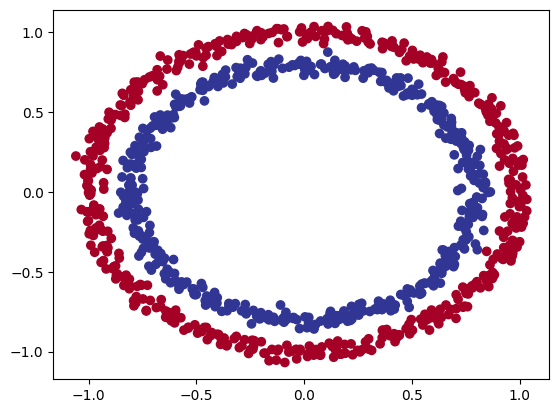

In [3]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

plt.show()

Validando os formatos de entrada e saída:

In [4]:
print(X.shape, y.shape)

(1000, 2) (1000,)


In [5]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Transformando os dados em tensores do `torch`:

In [6]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

print(type(X))
print(type(y))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


Separando o dataset em amostras de treinamento e teste:

In [7]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

800 200
800 200


Construindo um modelo de classificação:

1. Construir uma classe herdando de `nn.Module`.
2. Construir layers do tipo `nn.Linear` que sejam capazes de processar o dataset criado.
3. Definir o método `.forward()` do modelo.
4. Instanciar a classe e enviá-la para o dispositivo em uso.

In [8]:
class CircleModel1(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, tensor: torch.Tensor):
        return self.layer_2(self.layer_1(tensor))

In [9]:
model = CircleModel1().to(DEVICE)

print(model)

CircleModel1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


Refazendo o modelo acima utilizando `nn.Sequential`:

In [10]:
model = nn.Sequential(
    nn.Linear(2, 5),
    nn.Linear(5, 1)
).to(DEVICE)

print(model)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)


In [11]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [ ]:
with torch.inference_mode():
    predictions = model(X_test.to(DEVICE))

print('Predições:')
print(predictions[:5])
print(predictions.shape)

print('Testes:')
print(y_test[:5])
print(y_test.shape)

Predições:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])
torch.Size([200, 1])
Testes:
tensor([1., 0., 1., 0., 1.])
torch.Size([200])
